Exercise 3
==========

This lesson we will practice how to do data classification and
aggregation in Geopandas for vector and raster data

-   Don't forget to check out the hints for this lesson's exercise at the end of this notebook if you're having trouble.
-   Scores on this exercise are out of **10 points**.

Sections
--------

- Problem 2: Join accessibility datasets into a grid and visualize them by using a classifier (5 points)


### Problem 2: Join accessibility datasets into a grid and visualize them by using a classifier (5 points)

The overall aim this task is to understand the *dominance area* \[0\]
for **one** of the shopping centers in Helsinki with different travel
modes (Public transport, private car).

The *dominance area* is the geographical area from where the given
service (shopping center) is the closest one to reach in terms of travel
time.

**Steps:**

-   The assignment datasets include 7 text files containing data
    about accessibility in Helsinki Region and a Shapefile that contains
    a Polygon grid that can be used to visualize and analyze the data
    spatially. The datasets are:

    > -   `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` including
    >     travel times and road network distances to specific shopping
    >     center
    > -   `MetropAccess_YKR_grid_EurefFIN.shp` including the Polygon
    >     grid with \'YKR_ID\' column that can be used to join the grid
    >     with the accessibility data

-   Read the travel_time data file for one of the shopping centres with
    Pandas and select only following columns from them:

    > -   pt_r\_tt: travel mode Public tranport
    > -   car_r\_t: travel mode private car
    > -   from_id: travel start from (refering to a YKR_ID grid
    >     \"coordinate\")
    > -   to_id: travel destination (the YKR_ID frid coordinate of the
    >     shopping centre), that\'s why it is staying the same per
    >     shopping centre file

-   load the MetropAccess shapefile with geopandas

-   join/merge the shopping centre dataframe with the Metro grid
    dataframe based on the ID / YKR_ID column

-   create a classifier (custom or common one) based on the materials
    that we went through in the [lesson materials](https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html#classifying-data)

-   You need to classify the data into a new column in your
    GeoDataFrame. For classification, you can **either**:

    > -   Use the [common classifiers from pysal](https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html#classification-based-on-common-classification-schemes)
    > -   **OR** create your own custom classifiers. If you create your own, remember to
    >     document it well how it works! Write a general description of
    >     it and comment your code as well.

-   Visualize the **classified** travel times (Public transport AND Car)
    of the shopping centre with appropriate plots.

-   submit code and figures, as usual as Jupyter notebook and the maps
    you have visualized (as png).

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5975373,456,31918,49,31947,44,31985,110,137,32758,118,149,32758
1,5785641,5975373,419,29302,49,32158,44,32196,113,134,32964,121,147,32964
2,5785642,5975373,420,29381,57,31560,51,29821,115,134,33082,123,148,33082
3,5785643,5975373,424,29674,60,34116,55,32377,119,144,33375,127,152,33375
4,5787544,5975373,449,31429,48,31522,43,31559,103,121,32269,111,128,32269


Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt',
       'pt_m_d'],
      dtype='object')

from_id    int64
to_id      int64
walk_t     int64
walk_d     int64
car_r_t    int64
car_r_d    int64
car_m_t    int64
car_m_d    int64
pt_r_t     int64
pt_r_tt    int64
pt_r_d     int64
pt_m_t     int64
pt_m_tt    int64
pt_m_d     int64
dtype: object

<AxesSubplot:>

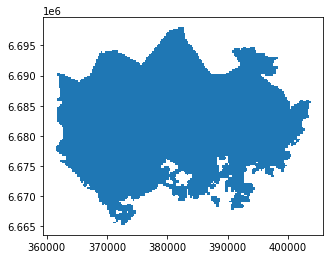

In [1]:
import gdal
import geopandas as gpd
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np

%matplotlib inline

# load the MetropAccess shapefile with geopandas

# File path
fp = "MetropAccess_YKR_grid_EurefFIN.shp"

df_grid = gpd.read_file(fp)

display(df_grid.head())

# travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt
fp_2 = "TravelTimes_to_5975373_Forum.txt"

df_tt = pd.read_csv(fp_2, sep=";")

display(df_tt.head())

display(df_tt.columns)
display(df_tt.dtypes)

df_grid.plot()

Index(['x', 'y', 'YKR_ID', 'geometry', 'pt_r_tt', 'car_r_t', 'from_id',
       'to_id'],
      dtype='object')

x            float64
y            float64
YKR_ID         int64
geometry    geometry
pt_r_tt        int64
car_r_t        int64
from_id        int64
to_id          int64
dtype: object

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",137,49,5785640,5975373
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",134,49,5785641,5975373
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",134,57,5785642,5975373
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",144,60,5785643,5975373
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",121,48,5787544,5975373


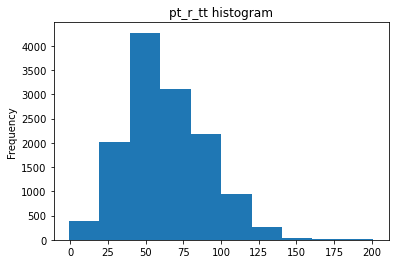

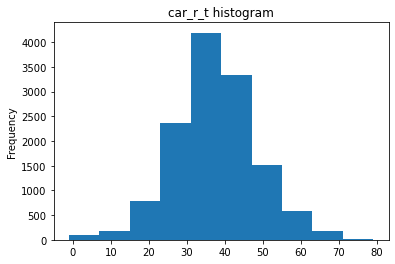

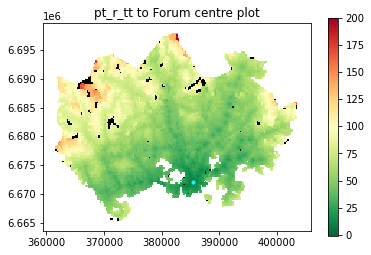

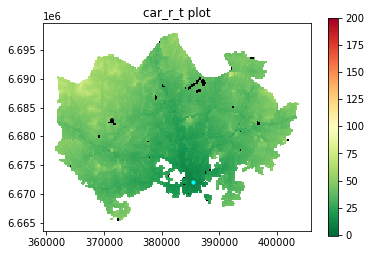

In [2]:
selected_tt = ['pt_r_tt', 'car_r_t', 'from_id', 'to_id']
#        pt_r_tt: travel mode Public tranport
#        car_r_t: travel mode private car
#        from_id: travel start from (refering to a YKR_ID grid “coordinate”)
#        to_id: travel destination (the YKR_ID frid coordinate of the shopping centre), that’s why it is staying the same per shopping centre file

selected_cols = ['ID','Remark','Shape_Area','CLC_CODE','LABEL3','RGB','geometry']

# Select data
df_tt = df_tt[selected_tt]

# What are the columns now?


# join/merge the shopping centre dataframe with the Metro grid dataframe based on the ID / YKR_ID column
data = df_grid.merge(df_tt, how='inner', left_on='YKR_ID', right_on='from_id', suffixes=('_grid', '_times'))

display(data.columns)
display(data.dtypes)

display(data.head())


fig, ax = plt.subplots()
data['pt_r_tt'].plot.hist(bins=10);
plt.title("pt_r_tt histogram")
plt.show()

fig, ax = plt.subplots()
data['car_r_t'].plot.hist(bins=10);
plt.title("car_r_t histogram")
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt', legend=True, vmax=200, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot")
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t', legend=True, vmax=200, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t plot")
plt.show()


In [5]:
cmap = plt.cm.viridis

n_classes = 5
classifier_nb = mc.NaturalBreaks.make(k=n_classes)

data['pt_r_tt_nb'] = data[['pt_r_tt']].apply(classifier_nb)

In [7]:
uniq_vals = data['pt_r_tt_nb'].unique().tolist()
class_lst = [int(x) for x in np.linspace(0,255,len(uniq_vals))]

class_lst

[0, 63, 127, 191, 255]

{'Class 0: -1 - 30': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 31 - 52': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 53 - 74': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 75 - 101': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 102 - 201': array([0.64705882, 0.        , 0.14901961, 1.        ])}


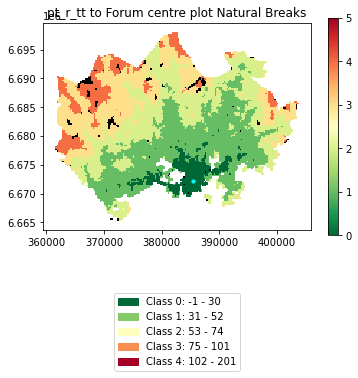

{'Class 0: -1 - 22': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 23 - 32': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 33 - 40': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 41 - 50': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 51 - 79': array([0.64705882, 0.        , 0.14901961, 1.        ])}


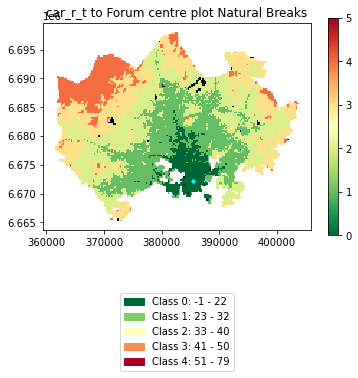

In [16]:
# create a classifier (custom or common one) based on the materials that we went through in the lesson materials
import mapclassify as mc
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

# You need to classify the data into a new column in your GeoDataFrame. For classification, you can either:

#        Use the common classifiers from pysal
#        OR create your own custom classifiers from pysal. If you create your own, remember to document it well how it works! Write a general description of it and comment your code as well.

# Visualize the classified travel times (Public transport AND Car) of the shopping centre with appropriate plots.
def prepareLegendPatch(df_name, data_column, class_column, cmap):
    
    grouped = df_name.groupby(class_column)
    
    uniq_vals = df_name[class_column].unique().tolist()
    class_lst = [int(x) for x in np.linspace(0,255,len(uniq_vals))]
    
    cmap=plt.cm.get_cmap(name=cmap)
    
    color_lookup = {}
    for label, icolor in zip( sorted(uniq_vals), cmap(class_lst)):
        color_lookup.update({label: icolor})

    # legend_dict = { 'class from to' : 'white'}
    legend_dict = {}

    for cla, datas in grouped:
        minv = datas[data_column].min()
        maxv = datas[data_column].max()
        legend_dict["Class {}: {} - {}".format(cla, minv, maxv)] = color_lookup[cla]

    print(legend_dict)  

    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color= legend_dict[key], label=key)
            patchList.append(data_key)
    return patchList

# NAtural Breaks for Car and Public Transport
n_classes = 5
classifier_nb = mc.NaturalBreaks.make(k=n_classes)

data['pt_r_tt_nb'] = data[['pt_r_tt']].apply(classifier_nb)
data['car_r_t_nb'] = data[['car_r_t']].apply(classifier_nb)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_nb', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Natural Breaks")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_nb', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_nb', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Natural Breaks")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_nb', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

{'Class 0: -1 - 39': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 40 - 79': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 80 - 120': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 121 - 158': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 163 - 201': array([0.64705882, 0.        , 0.14901961, 1.        ])}


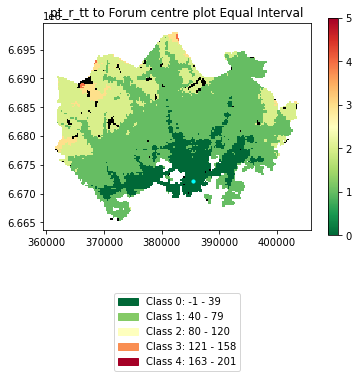

{'Class 0: -1 - 15': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 16 - 31': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 32 - 47': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 48 - 63': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 64 - 79': array([0.64705882, 0.        , 0.14901961, 1.        ])}


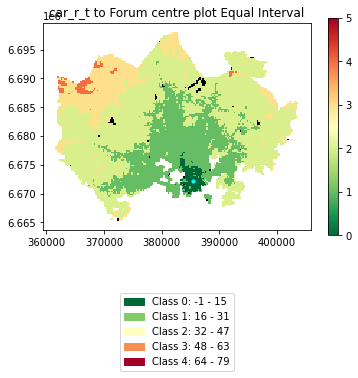

In [17]:
# Equal_Intervalfor Car and Public Transport
n_classes = 5
classifier_eq_intv = mc.EqualInterval.make(k=n_classes)

data['pt_r_tt_eq'] = data[['pt_r_tt']].apply(classifier_eq_intv)
data['car_r_t_eq'] = data[['car_r_t']].apply(classifier_eq_intv)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_eq', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Equal Interval")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_eq', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_eq', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Equal Interval")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_eq', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

{'Class 0: -1 - 41': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 42 - 53': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 54 - 66': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 67 - 85': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 86 - 201': array([0.64705882, 0.        , 0.14901961, 1.        ])}


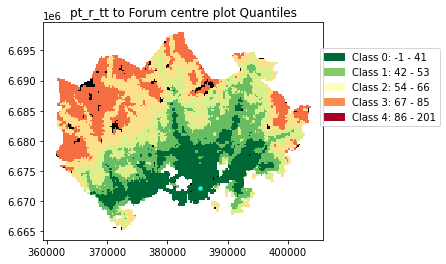

{'Class 0: -1 - 29': array([0.        , 0.40784314, 0.21568627, 1.        ]), 'Class 1: 30 - 34': array([0.51810842, 0.7928489 , 0.4011534 , 1.        ]), 'Class 2: 35 - 39': array([0.99707805, 0.9987697 , 0.74502115, 1.        ]), 'Class 3: 40 - 45': array([0.97485582, 0.557401  , 0.32272203, 1.        ]), 'Class 4: 46 - 79': array([0.64705882, 0.        , 0.14901961, 1.        ])}


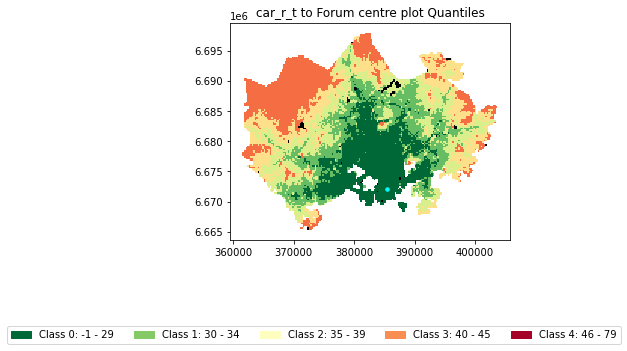

In [25]:
# Equal_Intervalfor Car and Public Transport
n_classes = 5
classifier_quantiles = mc.Quantiles.make(k=n_classes)

data['pt_r_tt_qa'] = data[['pt_r_tt']].apply(classifier_quantiles)
data['car_r_t_qa'] = data[['car_r_t']].apply(classifier_quantiles)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_qa', vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=12, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Quantiles")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_qa', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_qa', vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=12, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Quantiles")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_qa', cmap='RdYlGn_r')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.3, -0.5), ncol=5)
plt.show()

{'Class 0: -1 - 9': 'white', 'Class 1: 10 - 36': 'white', 'Class 2: 37 - 89': 'white', 'Class 3: 90 - 116': 'white', 'Class 4: 117 - 201': 'white'}


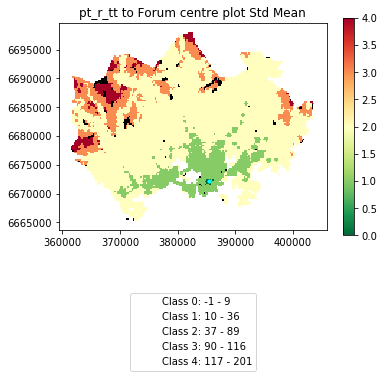

{'Class 0: -1 - 15': 'white', 'Class 1: 16 - 26': 'white', 'Class 2: 27 - 47': 'white', 'Class 3: 48 - 58': 'white', 'Class 4: 59 - 79': 'white'}


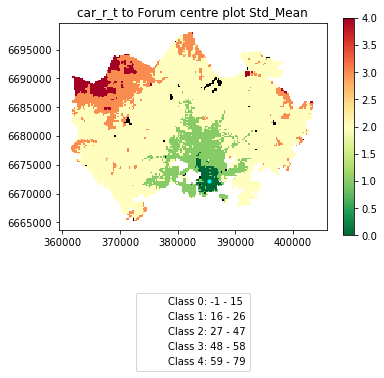

In [6]:

# Equal_Intervalfor Car and Public Transport
classifier_std_mean = mc.StdMean.make()

data['pt_r_tt_std'] = data[['pt_r_tt']].apply(classifier_std_mean)
data['car_r_t_std'] = data[['car_r_t']].apply(classifier_std_mean)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_std', legend=True, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Std Mean")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_std')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_std', legend=True, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Std_Mean")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_std')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()